In [760]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from hmmlearn.hmm import GaussianHMM
import datetime
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# from keras.layers import Dropout

In [761]:
df = pd.read_csv('GoogleStocks.csv')

In [762]:
df=df.drop(df.index[0])

In [763]:
df.head()

,date,close,volume,open,high,low
1,2019/03/26,1184.6200,1894639.0000,1198.5300,1202.8300,1176.7200
2,2019/03/25,1193.0000,1493841.0000,1196.9300,1206.3975,1187.0400
3,2019/03/22,1205.5000,1668910.0000,1226.3200,1230.0000,1202.8250
4,2019/03/21,1231.5400,1195899.0000,1216.0000,1231.7900,1213.1500
5,2019/03/20,1223.9700,2089367.0000,1197.3500,1227.1400,1196.1700


In [764]:
df['close'].head()

1    1184.6200
2    1193.0000
3    1205.5000
4    1231.5400
5    1223.9700
Name: close, dtype: object

In [765]:
df['close']=df['close'].astype('float') 

In [766]:
df['date'].head()

1    2019/03/26
2    2019/03/25
3    2019/03/22
4    2019/03/21
5    2019/03/20
Name: date, dtype: object

In [767]:
df['open']=df['open'].astype('float') 

In [768]:
df['volume']=df['volume'].astype('float') 

In [769]:
df['high']=df['high'].astype('float') 

In [770]:
df['low']=df['low'].astype('float') 

In [771]:
df=df.sort_values(by='date')

In [772]:
label=df['open']

In [773]:
df.head()

,date,close,volume,open,high,low
755,2016/03/28,733.53,1300817.0,736.79,738.99,732.50
754,2016/03/29,744.77,1902254.0,734.59,747.25,728.76
753,2016/03/30,750.53,1782278.0,750.10,757.88,748.74
752,2016/03/31,744.95,1718638.0,749.25,750.85,740.94
751,2016/04/01,749.91,1576240.0,738.60,750.34,737.00


In [774]:
# df=df.drop(['date','close'],axis=1)

In [775]:
high=df['high'].values
low=df['low'].values
average=(high+low)/2

In [776]:
# df['date']

In [777]:
df['average']=average
df['date']= pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [778]:
df.head()

,close,volume,open,high,low,average
date,,,,,,
2016-03-28,733.53,1300817.0,736.79,738.99,732.50,735.745
2016-03-29,744.77,1902254.0,734.59,747.25,728.76,738.005
2016-03-30,750.53,1782278.0,750.10,757.88,748.74,753.310
2016-03-31,744.95,1718638.0,749.25,750.85,740.94,745.895
2016-04-01,749.91,1576240.0,738.60,750.34,737.00,743.670


In [779]:
label.head()

755    736.79
754    734.59
753    750.10
752    749.25
751    738.60
Name: open, dtype: float64

In [780]:
label=label.astype('float')
label=np.array(label)
savedlabel=(label)
# label.shape

In [781]:
label=label.reshape(755,1)
label.shape

(755, 1)

In [782]:
# features=df[['open','volume','average']]
# features.head()

In [783]:
# m=np.mean(features)
# std=np.std(features)

In [784]:
# features=(features-m)/std

In [785]:
# features.head()

In [786]:
# features.head()

In [787]:
df.head()

,close,volume,open,high,low,average
date,,,,,,
2016-03-28,733.53,1300817.0,736.79,738.99,732.50,735.745
2016-03-29,744.77,1902254.0,734.59,747.25,728.76,738.005
2016-03-30,750.53,1782278.0,750.10,757.88,748.74,753.310
2016-03-31,744.95,1718638.0,749.25,750.85,740.94,745.895
2016-04-01,749.91,1576240.0,738.60,750.34,737.00,743.670


In [788]:
df.iloc[0]

close          733.530
volume     1300817.000
open           736.790
high           738.990
low            732.500
average        735.745
Name: 2016-03-28 00:00:00, dtype: float64

In [789]:
ml=np.mean(label)
stdl=np.std(label)
label=(label-ml)/stdl

In [790]:
label.shape

(755, 1)

In [791]:
# features.head()
df.reset_index(inplace=True,drop=False)
df.drop(['close','high','low'],axis=1,inplace=True)

In [792]:
# df['date']

In [793]:
df = list(df.itertuples(index=False, name=None))
# df

In [794]:
open1 = np.array([q[1] for q in df])
vol = np.array([q[2] for q in df])[1:]
# (end_val)

In [795]:
# end_val = np.array([q[2] for q in df])
# volume = np.array([q[1] for q in df])[1:]
pp = np.diff(open1)
open1 = open1[1:]
X = np.column_stack([pp, vol])

In [796]:
hmm = GaussianHMM(n_components=4, covariance_type="diag", n_iter=500)
hmm.fit(X)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=4, n_iter=500, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [797]:
hs = hmm.predict(X)

In [800]:
def hmmq2(df,hmm,hs,time_steps):
    predict_stock_price = []
    OpenVol = np.dot(hmm.transmat_, hmm.means_)
    OpVol = list(zip(*OpenVol))
    Open = OpVol[0]
    Volamt = OpVol[1]
    for idx in range(time_steps):
        state = hs[-time_steps+idx]
        cp = df[-time_steps+idx][1]
        volume = df[-time_steps+idx][2]
        predict_stock_price.append(cp + Open[state])  
#     print((predict_stock_price))
#     print((end_val[-time_steps:]))
    plt.plot(end_val[-time_steps:], color = 'red', label = 'Real Google Stock Price')
    plt.plot(predict_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()

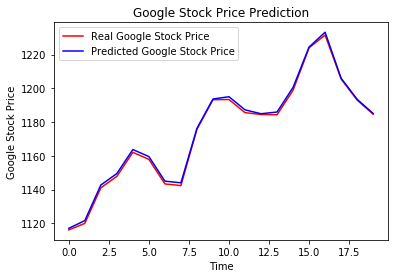

In [801]:
hmmq2(df,hmm,hs,20)

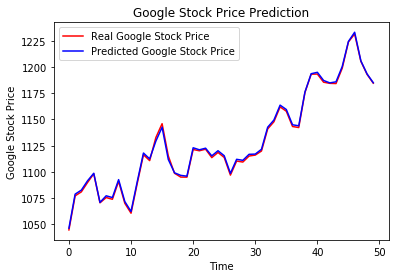

In [802]:
hmmq2(df,hmm,hs,50)

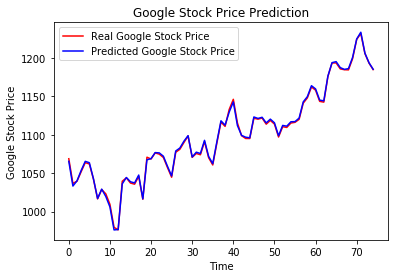

In [803]:
hmmq2(df,hmm,hs,75)

In [804]:
hmm8 = GaussianHMM(n_components=8, covariance_type="diag", n_iter=500)
hmm8.fit(X)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=8, n_iter=500, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [805]:
hs1 = hmm8.predict(X)

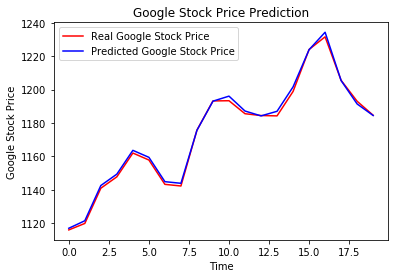

In [806]:
hmmq2(df,hmm8,hs1,20)

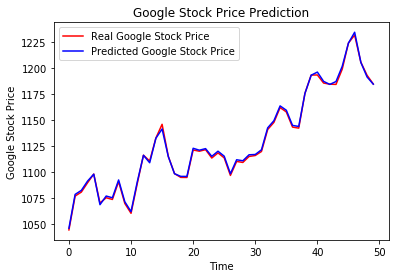

In [807]:
hmmq2(df,hmm8,hs1,50)

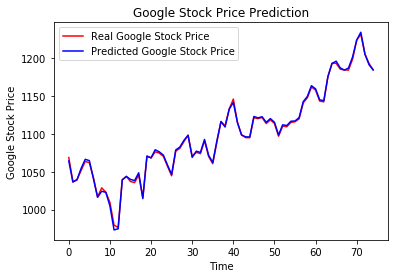

In [808]:
hmmq2(df,hmm8,hs1,75)

In [809]:
hmm3 = GaussianHMM(n_components=12, covariance_type="diag", n_iter=500)
hmm3.fit(X)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=12, n_iter=500, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [810]:
hs2 = hmm3.predict(X)

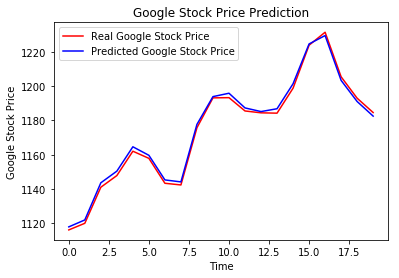

In [811]:
hmmq2(df,hmm3,hs2,20)

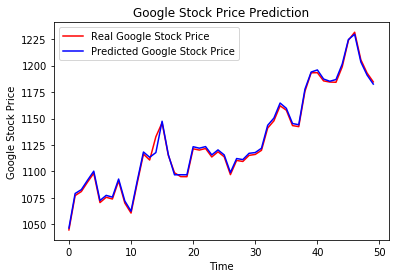

In [813]:
hmmq2(df,hmm3,hs2,50)

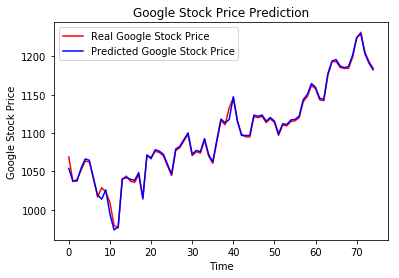

In [814]:
hmmq2(df,hmm3,hs2,75)

## Part 3:

## From graphs it is evident that hmm is giving better results